In [22]:
import sqlite3
import pandas as pd
import seaborn as sns


Matplotlib is building the font cache; this may take a moment.


In [21]:
pip install seaborn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.5/159.5 kB 734.1 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 1.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 5.6 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 263.3/263.3 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 6.2 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 885.3 kB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 6.5 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 kB 1.4 MB/s eta 0:00:00:00:01
Note: you may need to restart the kernel to use updated packages.


In [14]:
%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [17]:
connection = sqlite3.connect("/Users/leonardofernandezj./Documents/UNIVERSIDAD/12 semestre/MÉTODOS COMPU/ANTR-2029-ANTRCOMP/Semana6/Entregas/ENTREGA SPOTIFY LFJ/music_smaller_10000.db.db")

In [19]:
# Crear el query entre comillas y transformaarlos en una dataframe
query = "SELECT * FROM playlists"
datos = pd.read_sql_query(query, connection)

# Mostrar cómo queda el archivo
print(datos.head())

   slice  pid  modified_at  num_tracks  num_albums  num_followers  num_edits  \
0  0-999    0   1493424000          52          47              1          6   
1  0-999    1   1506556800          39          23              1          5   
2  0-999    2   1505692800          64          51              1         18   
3  0-999    3   1501027200         126         107              1          4   
4  0-999    4   1401667200          17          16              2          7   

   duration_ms  num_artists  
0     11532414           37  
1     11656470           21  
2     14039958           31  
3     28926058           86  
4      4335282           16  


In [1]:
sns.histplot(data=datos,x="num_tracks")

NameError: name 'sns' is not defined

<Axes: xlabel='num_tracks', ylabel='Count'>

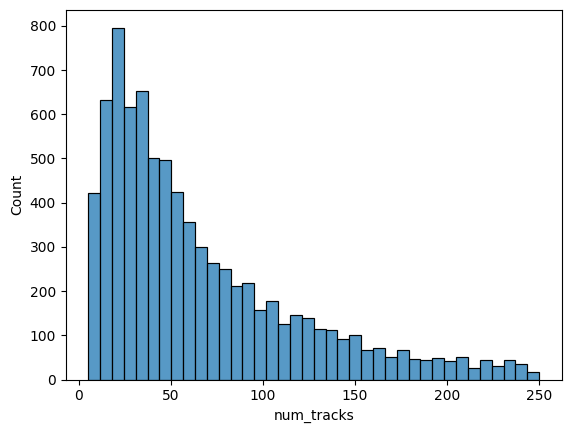

In [10]:
sns.histplot(data=datos,x="num_tracks")
#La mayoría de las listas de reproducción tienen menos de 50 pistas, con un pico en torno a 20-30 pistas. A medida que aumenta el número de pistas, el número de listas de reproducción disminuye gradualmente, mostrando una distribución con sesgo a la derecha.


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt



In [6]:
import sqlite3
import pandas as pd
import seaborn as sns


In [7]:
%load_ext sql

In [8]:
connection = sqlite3.connect("/Users/leonardofernandezj./Documents/UNIVERSIDAD/12 semestre/MÉTODOS COMPU/ANTR-2029-ANTRCOMP/Semana6/Entregas/ENTREGA SPOTIFY LFJ/music_smaller_10000.db.db")


In [9]:
# Crear el query entre comillas y transformaarlos en una dataframe
query = "SELECT * FROM playlists"
datos = pd.read_sql_query(query, connection)

# Mostrar cómo queda el archivo
print(datos.head())

   slice  pid  modified_at  num_tracks  num_albums  num_followers  num_edits  \
0  0-999    0   1493424000          52          47              1          6   
1  0-999    1   1506556800          39          23              1          5   
2  0-999    2   1505692800          64          51              1         18   
3  0-999    3   1501027200         126         107              1          4   
4  0-999    4   1401667200          17          16              2          7   

   duration_ms  num_artists  
0     11532414           37  
1     11656470           21  
2     14039958           31  
3     28926058           86  
4      4335282           16  


Text(0, 0.5, 'duracion en ms')

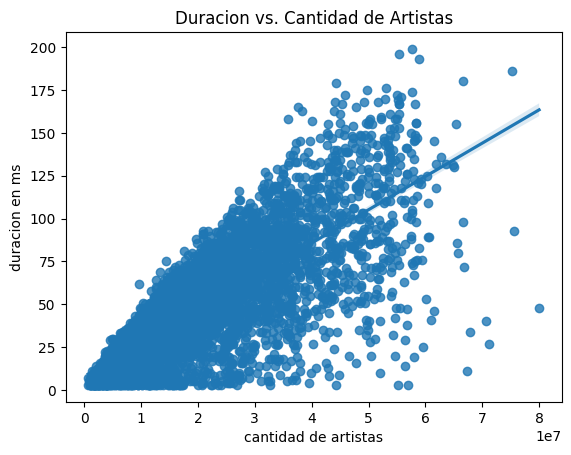

In [27]:
sns.regplot(data=datos,x="duration_ms",y="num_artists")
plt.title("Duracion vs. Cantidad de Artistas")
plt.xlabel("cantidad de artistas")
plt.ylabel("duracion en ms")
#Este gráfico muestra que cuanta mayor sea la cantidad de artistas, mayor se espera que sea la duración de cada canción. En términos generales, sin embargo, la duración promedio se sitúa entee los tres y cuatro artistas. 


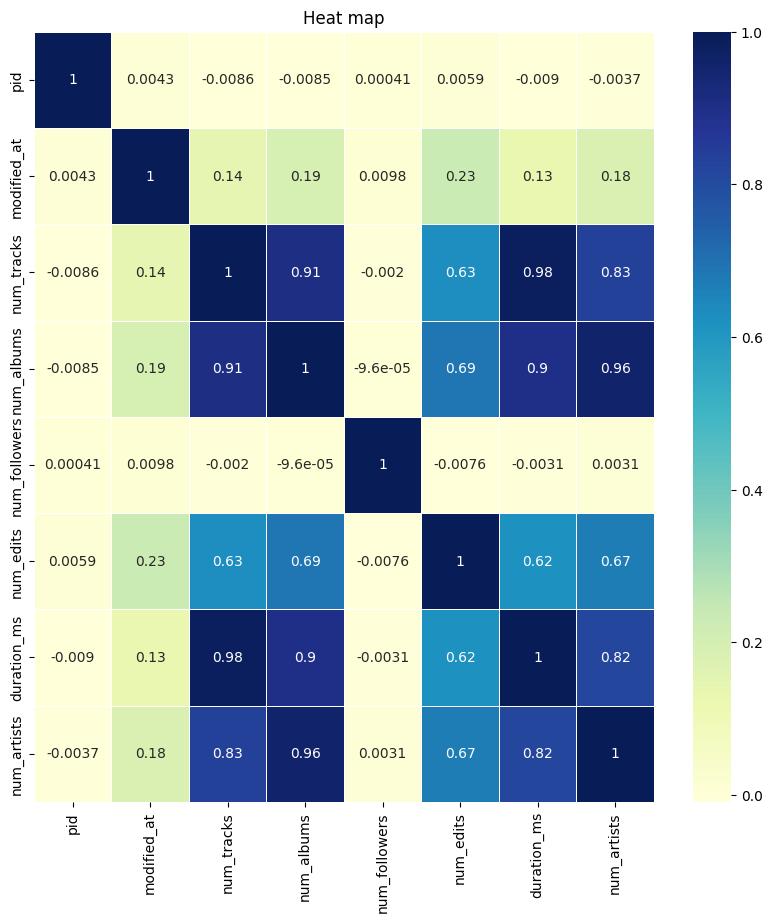

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
info=datos.select_dtypes(include=[float,int])
datofinal=info.corr()
sns=sns.heatmap(datofinal,cmap="YlGnBu",annot=True,linewidths=0.5)
plt.title("Heat map")
plt.show()
#Relaciones Destacadas:
# num_tracks y num_albums tienen una correlación muy alta de 0.91, lo que sugiere que a medida que aumenta el número de pistas, también aumenta el número de álbumes.
# num_albums y num_artists tienen una alta correlación de 0.96, indicando que más álbumes están asociados con más artistas.
# num_tracks y duration_ms tienen una correlación alta de 0.98, sugiriendo que más pistas resultan en una mayor duración total en milisegundos.
# num_albums y duration_ms también tienen una alta correlación de 0.90.

Text(5.069444444444445, 0.5, 'numero albumes')

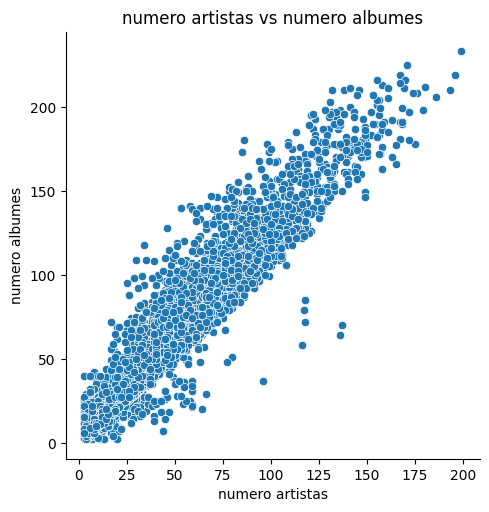

In [38]:
sns.relplot(data=datos,x="num_artists",y="num_albums")
plt.title("numero artistas vs numero albumes")
plt.xlabel("numero artistas")
plt.ylabel("numero albumes")
#El número de artistas por álbum va reduciéndose en función de la cantidad de álbumes. Eso quiere decir que las listas con mayor variedad de artistas tienen mayor cantidad de álbumes. 


Text(30.71381172839505, 0.5, 'numero de artistas')

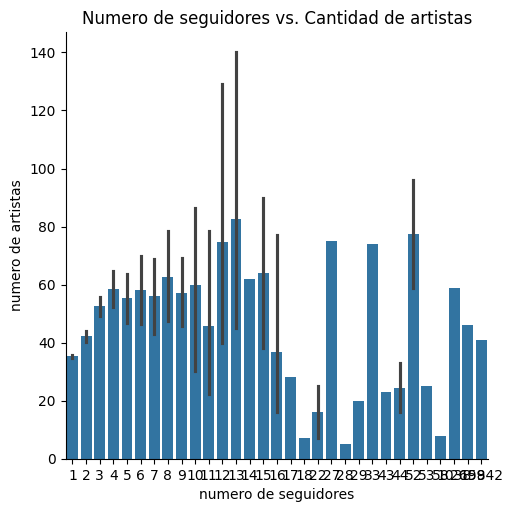

In [39]:
sns.catplot(data=datos,x="num_followers",y="num_artists",kind="bar")
plt.title("Numero de seguidores vs. Cantidad de artistas")
plt.xlabel("numero de seguidores")
plt.ylabel("numero de artistas")

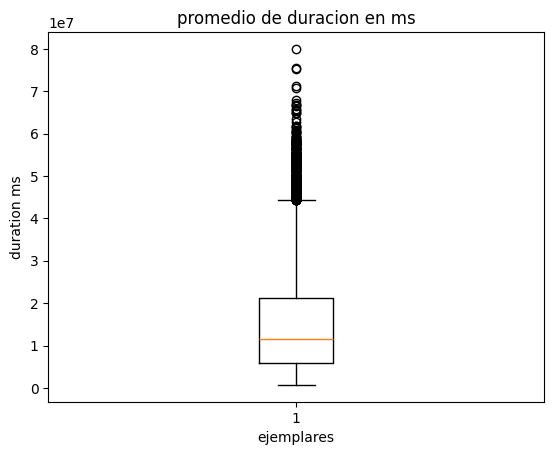

In [45]:
import matplotlib.pyplot as plt
variable_duracion=datos["duration_ms"]
plt.boxplot(x=variable_duracion)
plt.xlabel("ejemplares")
plt.ylabel("duration ms")
plt.title("promedio de duracion en ms")
plt.show()
#Interpretación General:
# Mediana: La mediana de la duración está cerca de 1 * 10^7 ms.
# Rango Intercuartil: La mayoría de los datos (50%) se encuentran entre aproximadamente 0.5 * 10^7 ms y 2 * 10^7 ms.
# Outliers: Hay muchos outliers por encima del bigote superior, indicando que hay duraciones que son significativamente más largas que la mayoría de los datos.
# En resumen, este gráfico muestra que la mayoría de los ejemplares tienen una duración entre aproximadamente 0.5 * 10^7 ms y 2 * 10^7 ms, con una mediana cerca de 1 * 10^7 ms, pero hay muchos valores atípicos que tienen duraciones mucho mayores.


